<a href="https://colab.research.google.com/github/Inshalkhan/Social-Distancing-Identification-through-Computer-Vision/blob/master/Social_Distancing_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

!gcc --version

# installing detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
     |████████████████████████████████| 276kB 6.2MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=c9a3daf638265e8b76cb8258e5857231c8ff191fe716f34cbc34198c01bed7ed
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-4g8eofdf
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-4g8eofdf
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-lin

In [0]:
# Imporing detectron2
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# importing common use libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# importing detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [3]:
%%time
!rm -r frames/*
!mkdir frames/

#specify path to video
video = "sample video.mp4"

#capturing video
cap = cv2.VideoCapture(video)
cnt=0

# Check if video file is opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret,first_frame = cap.read()

#Read until video is completed
while(cap.isOpened()):
    
# Capturing frame-by-frame
  ret, frame = cap.read()
     
  if ret == True:

#save each frame to folder        
    cv2.imwrite('frames/'+str(cnt)+'.png', frame)
    cnt=cnt+1
    if(cnt==750):
      break

  # Break the loop
  else: 
    break

rm: cannot remove 'frames/*': No such file or directory
CPU times: user 14 s, sys: 499 ms, total: 14.5 s
Wall time: 16.7 s


In [4]:
#Printing the frame rate of video
FPS=cap.get(cv2.CAP_PROP_FPS)
print(FPS)

25.0


In [5]:
cfg = get_cfg()

# add project-specific config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set threshold for this model

# model from detectron2's model zoo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_f97cb7.pkl: 136MB [00:27, 4.95MB/s]                           


In [0]:
#reading an image
img = cv2.imread("frames/10.png")

#pass to the model
outputs = predictor(img)

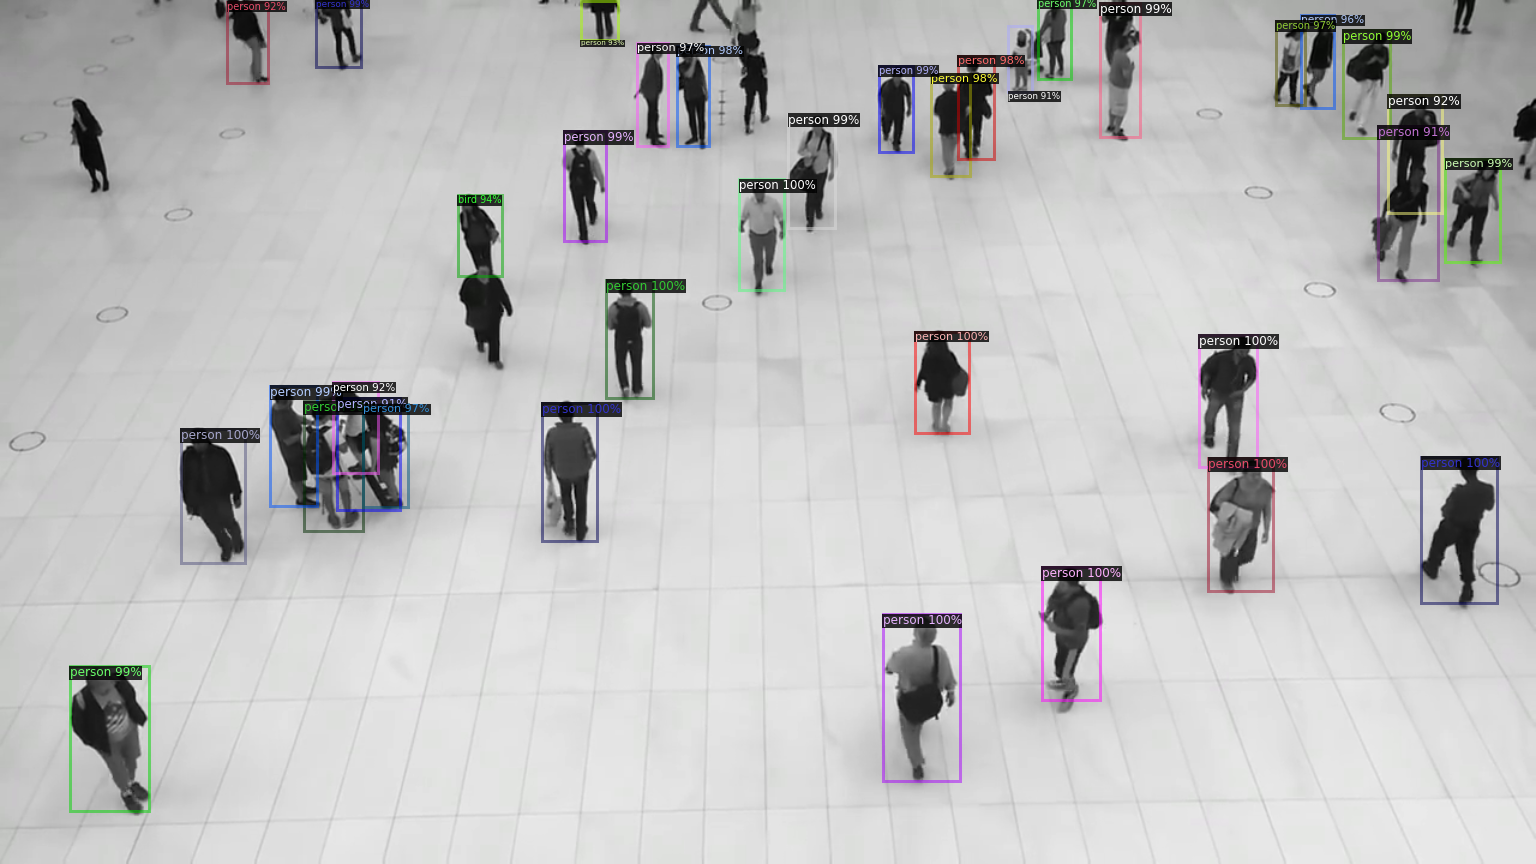

In [7]:
# Use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [8]:
classes=outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 14  0  0  0  0  0  0  0]


In [9]:
bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[5.05271240e+02 2.33643982e+02 5.43793945e+02 3.32454529e+02]
 [9.99057373e+02 2.79882874e+02 1.04767065e+03 3.90001587e+02]
 [1.50518555e+02 3.57827820e+02 2.04424225e+02 4.69326294e+02]
 [7.35459167e+02 5.12195374e+02 8.00043701e+02 6.50882446e+02]
 [4.51785553e+02 3.36354462e+02 4.97727753e+02 4.50871307e+02]
 [1.18441956e+03 3.81011230e+02 1.24782092e+03 5.03089386e+02]
 [8.68474792e+02 4.72841187e+02 9.16442810e+02 5.83345581e+02]
 [6.16133728e+02 1.50332672e+02 6.53200134e+02 2.42158310e+02]
 [7.62183533e+02 2.76934082e+02 8.07101440e+02 3.61512604e+02]
 [1.00696271e+03 3.82046326e+02 1.06070239e+03 4.92448761e+02]
 [2.25290482e+02 3.22125977e+02 2.64570557e+02 4.22316315e+02]
 [4.69861633e+02 1.09939697e+02 5.05185730e+02 2.01353851e+02]
 [7.32189514e+02 5.60562744e+01 7.60617737e+02 1.27190094e+02]
 [1.20456482e+03 1.33448456e+02 1.24996033e+03 2.19130386e+02]
 [6.57035400e+02 9.55932693e+01 6.95700928e+02 1.90560410e+02]
 [2.63505402e+02 5.87938845e-01 3.00851837e+02 5.676084

In [0]:
#identiting only persons 
ind = np.where(classes==0)[0]

#identifing bounding box of only persons
person=bbox[ind]

#total no. of persons
num= len(person)

505.27124 233.64398 543.79395 332.45453


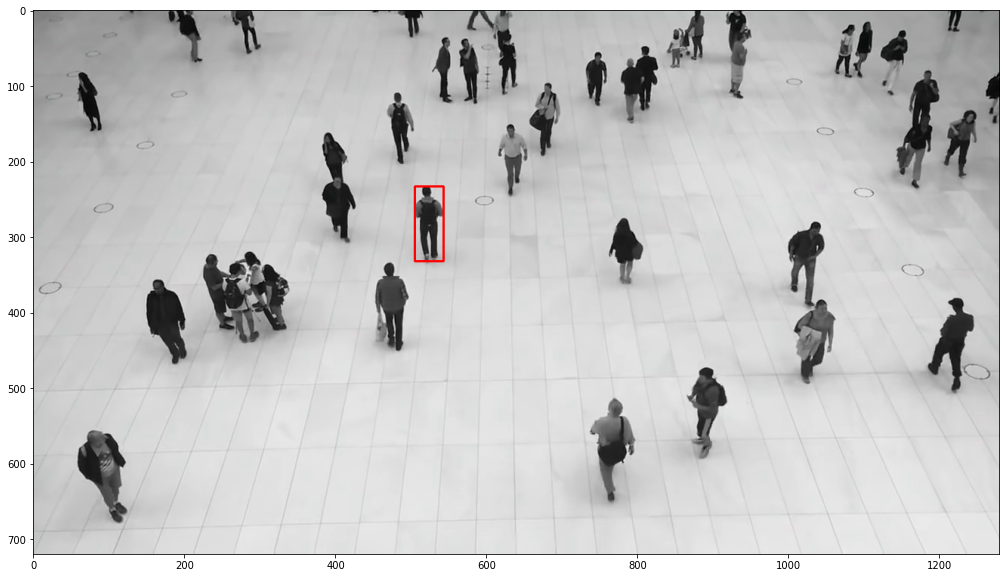

In [12]:
#For a box around person
x1,y1,x2,y2 = person[0]
print(x1,y1,x2,y2)

#Taking image to print box around person
img = cv2.imread('frames/10.png')
_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

plt.figure(figsize=(20,10))
plt.imshow(img)

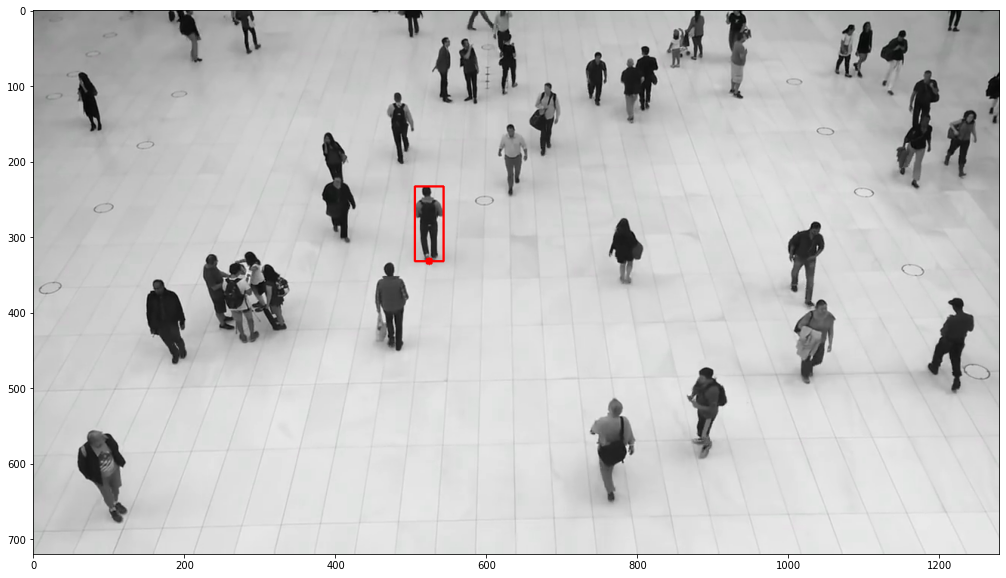

In [13]:
#Center of a person 
x_center = int((x1+x2)/2)
y_center = int(y2)

center = (x_center, y_center)

_ = cv2.circle(img, center, 5, (255, 0, 0), -1)
plt.figure(figsize=(20,10))
plt.imshow(img)

In [0]:
#define a function which return the bottom center of every bbox
def mid_point(img,person,idx):
  #get the coordinates
  x1,y1,x2,y2 = person[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
  
  #compute bottom center of bbox
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid   = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 0, 255), -1)
  cv2.putText(img, str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)
  
  return mid

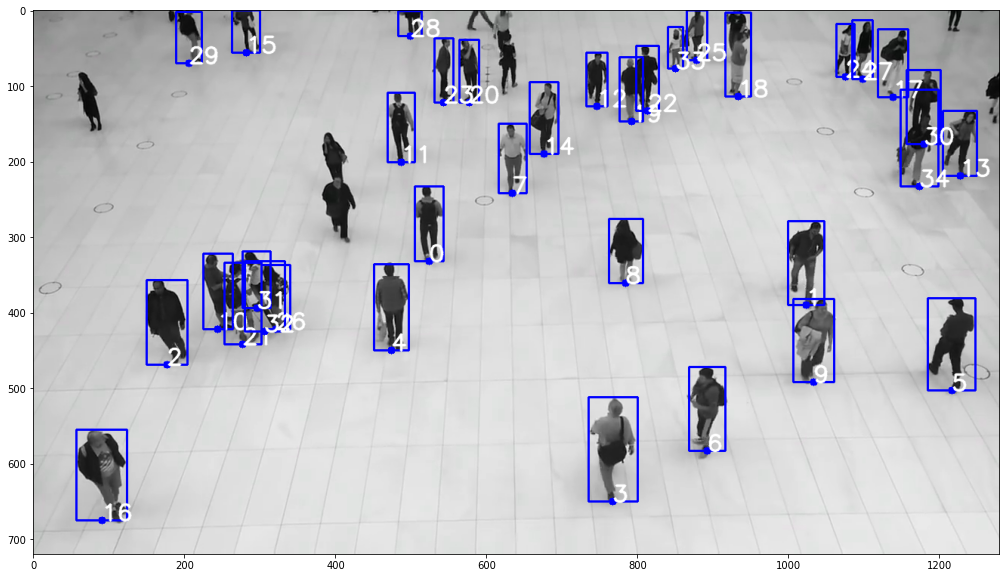

In [15]:
#call the function
midpoints = [mid_point(img,person,i) for i in range(len(person))]

#visualize image
plt.figure(figsize=(20,10))
plt.imshow(img)

In [16]:
%%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

CPU times: user 53.2 ms, sys: 12 ms, total: 65.2 ms
Wall time: 65.5 ms


In [0]:
dist= compute_distance(midpoints,num)

In [18]:
%%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11 µs


In [19]:
import pandas as pd

thresh=100
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

,p1,p2,dist
0,2,10,81.841310
1,7,14,66.843100
2,10,21,38.587563
3,10,26,77.000000
4,10,31,59.059292
5,10,32,62.072538
6,11,23,96.834911
7,12,14,94.175368
8,12,19,50.159745
9,12,22,67.268120


In [0]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)  
  return img

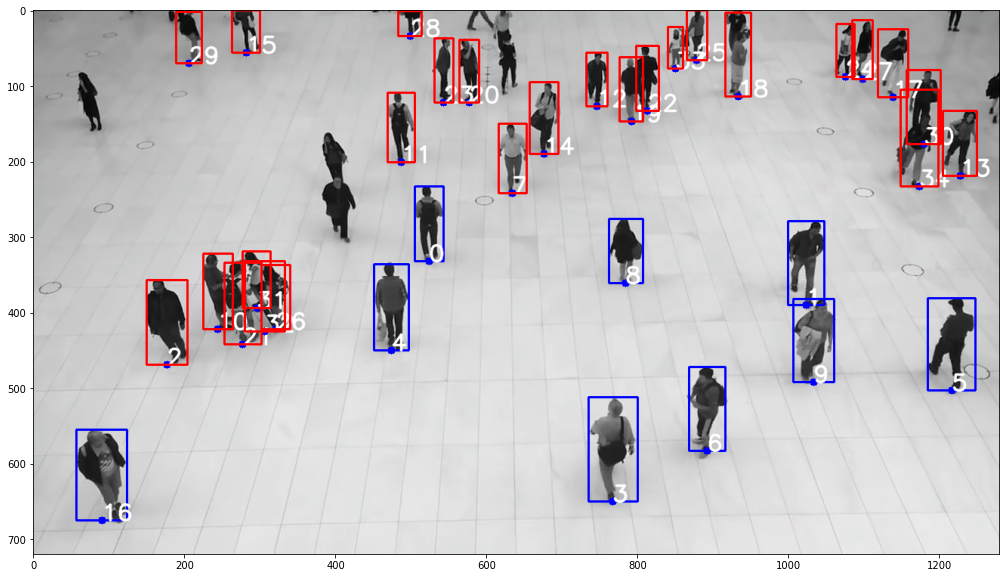

In [21]:
img = change_2_red(img,person,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [0]:
import os
import re

names=os.listdir('frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [0]:
#Function to find closest people
def find_closest_people(name,thresh):

  img = cv2.imread('frames/'+name)
  outputs = predictor(img)
  classes=outputs['instances'].pred_classes.cpu().numpy()
  bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person=bbox[ind]
  midpoints = [mid_point(img,person,i) for i in range(len(person))]
  num = len(midpoints)
  dist= compute_distance(midpoints,num)
  p1,p2,d=find_closest(dist,num,thresh)
  img = change_2_red(img,person,p1,p2)
  cv2.imwrite('frames/'+name,img)
  return 0

In [24]:
from tqdm import tqdm
thresh=100
_ = [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]

100%|██████████| 340/340 [05:43<00:00,  1.01s/it]


In [25]:
%%time
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    
    #reading each files
    img = cv2.imread('frames/'+frames[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

out = cv2.VideoWriter('sample_output.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

CPU times: user 9.21 s, sys: 497 ms, total: 9.7 s
Wall time: 9.47 s
